In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("experiments_2.csv")

In [151]:
df.head()

,run_id,tested_parameter,initial_population_size,initial_network_size,max_network_size,generations,time,cost,connectivity,fitness,best_fitness_gen,solution_size,execution_time
0,1,initial_population_size,15,10,15,45,157670,114000,1.0235,190704.5970,30,3,25.8233
1,2,initial_population_size,15,10,15,45,162600,135000,1.1036,200636.2834,22,3,26.8024
2,3,initial_population_size,15,10,15,45,158960,118000,1.0607,193167.2420,29,3,24.6618
3,4,initial_population_size,15,10,15,45,156110,116000,1.0035,189344.5805,23,3,26.1230
4,5,initial_population_size,15,10,15,45,155790,149000,1.0000,195590.0000,43,4,25.9360


In [152]:
df.describe()

,run_id,initial_population_size,initial_network_size,max_network_size,generations,time,cost,connectivity,fitness,best_fitness_gen,solution_size,execution_time
count,680.000000,680.000000,680.000000,680.000000,680.00000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,10.500000,33.676471,12.941176,15.000000,52.50000,157544.735294,124414.705882,1.031927,192746.904520,32.111765,3.042647,69.689170
std,5.770526,4.590575,7.686574,1.213571,18.88848,1487.901900,10499.249776,0.023497,2062.140946,18.044516,0.259611,26.709532
min,1.000000,15.000000,5.000000,10.000000,20.00000,155790.000000,101000.000000,1.000000,188144.580500,3.000000,2.000000,23.827000
25%,5.750000,35.000000,10.000000,15.000000,45.00000,156180.000000,117000.000000,1.023500,191381.759800,19.000000,3.000000,55.410600
50%,10.500000,35.000000,10.000000,15.000000,45.00000,157670.000000,122000.000000,1.026900,192433.542600,29.500000,3.000000,62.807850
75%,15.250000,35.000000,10.000000,15.000000,60.00000,158360.000000,131000.000000,1.047700,193963.157950,41.000000,3.000000,81.488550
max,20.000000,40.000000,40.000000,20.000000,100.00000,162600.000000,173000.000000,1.130400,200636.283400,99.000000,4.000000,137.879400


In [153]:
parameters = df['tested_parameter'].unique()

# Dataframe analysis

In [154]:
RESULT_COLUMNS = [
    "time",
    "cost",
    "connectivity",
    "fitness",
    "best_fitness_gen",
    "execution_time"
]

In [155]:
def analyze_all_parameters(df, result_cols):
    results = {}

    for param in df["tested_parameter"].unique():
        sub_df = df[df["tested_parameter"] == param]

        grouped = (
            sub_df
            .groupby(param, as_index=False)[result_cols]
            .agg(["mean", "std", "count"])
        )

        results[param] = grouped

    return results

analysis = analyze_all_parameters(df, RESULT_COLUMNS)

In [156]:
analysis.keys()

dict_keys(['initial_population_size', 'initial_network_size', 'max_network_size', 'generations'])

In [157]:
analysis['initial_population_size']

initial_population_size      time                         cost  \
                               mean          std count      mean   
0                      15  157764.0  1899.438698    20  133550.0   
1                      20  158231.5  1915.870765    20  124100.0   
2                      25  157019.0  1360.684425    20  127950.0   
3                      30  157362.0  1543.313592    20  124500.0   
4                      35  157794.5  1399.787484    20  124350.0   
5                      40  157256.0  1262.388713    20  124350.0   

                      connectivity                        fitness  \
            std count         mean       std count           mean   
0  14529.371341    20     1.034345  0.032855    20  194817.356840   
1   8632.252862    20     1.045390  0.030257    20  193505.424855   
2   9800.510191    20     1.027505  0.025717    20  192883.972315   
3  10615.281933    20     1.031885  0.024284    20  192580.820570   
4   9109.133646    20     1.038135  0.024231    20  193045.767460   
5  10663.637179    20     1.027290  0.017990    20  192398.804600   

                     best_fitness_gen                  execution_time  \
           std count             mean        std count           mean   
0  3362.964577    20            28.00   8.058993    20      25.197460   
1  1870.931385    20            30.25  10.104064    20      35.224275   
2  1795.395198    20            23.00  11.832160    20      45.469810   
3  2004.710205    20            27.95  11.459195    20      56.053305   
4  1646.664878    20            30.50  10.831241    20      66.563065   
5  1422.298196    20            28.60   9.224681    20      76.276110   

                   
        std count  
0  1.066913    20  
1  1.039427    20  
2  1.407091    20  
3  1.870047    20  
4  2.495392    20  
5  2.099763    20

In [158]:
analysis['generations']

generations      time                         cost                      \
                    mean          std count      mean           std count   
0           20  158463.5  1960.553829    20  130000.0  17128.001082    20   
1           25  157533.0  1912.257140    20  130250.0  14613.890292    20   
2           30  157552.5  1563.760229    20  126850.0  12942.280772    20   
3           35  158729.0  1973.441824    20  125450.0  11695.590712    20   
4           40  157529.0  1417.606953    20  124800.0   9550.971293    20   
5           45  157600.5   911.877618    20  124000.0   8182.137155    20   
6           50  157273.5  1241.752899    20  124650.0   7336.103942    20   
7           55  156956.0  1124.241967    20  125500.0  11945.049624    20   
8           60  157502.0  1232.321728    20  121850.0   8014.953131    20   
9           65  157380.0  1213.186322    20  123900.0   8866.851337    20   
10          70  157794.0  1559.849520    20  119450.0   6353.407706    20   
11          75  157458.5   927.641463    20  120600.0   7956.460467    20   
12          80  157712.5  1047.758886    20  120000.0   5301.439725    20   
13          85  157395.0  1635.592601    20  119400.0   8413.022487    20   
14          90  156754.5  1030.265551    20  121450.0   7742.398649    20   
15          95  157071.0  1162.161779    20  120550.0   7667.257796    20   
16         100  157273.0  1043.279748    20  120700.0   8479.697115    20   

   connectivity                        fitness                     \
           mean       std count           mean          std count   
0      1.044440  0.034206    20  194907.880280  2913.198315    20   
1      1.031800  0.029319    20  193900.958175  2342.170028    20   
2      1.035800  0.028498    20  193280.439975  2779.600203    20   
3      1.048585  0.030957    20  194304.825030  2105.475772    20   
4      1.030165  0.018012    20  192790.649675  1872.641058    20   
5      1.027840  0.014655    20  192678.815970  1141.777297    20   
6      1.025000  0.014831    20  192453.446625  1049.004776    20   
7      1.025190  0.019166    20  192307.769045  1876.044019    20   
8      1.027135  0.015627    20  192143.227940  1291.826530    20   
9      1.030850  0.023148    20  192468.531500  2086.294949    20   
10     1.031960  0.020438    20  192003.567570  1726.460501    20   
11     1.030510  0.013188    20  191883.649410  1547.417793    20   
12     1.032695  0.012681    20  192039.575500  1026.978211    20   
13     1.027980  0.021481    20  191554.638320  1461.189614    20   
14     1.022440  0.018821    20  191268.878495  1323.699295    20   
15     1.026395  0.016689    20  191444.882435  1250.906328    20   
16     1.028870  0.014873    20  191701.784650  1216.490289    20   

   best_fitness_gen                  execution_time                  
               mean        std count           mean       std count  
0             12.70   3.743064    20      31.976695  3.631228    20  
1             15.60   6.003508    20      37.606290  1.488242    20  
2             18.75   7.745117    20      43.694775  1.650882    20  
3             24.15   8.151687    20      50.498615  1.193917    20  
4             21.80   9.971538    20      56.473315  1.851471    20  
5             27.95  12.085115    20      63.251040  1.462490    20  
6             28.55  11.887521    20      69.392230  1.619640    20  
7             33.95  13.398645    20      75.938210  1.923000    20  
8             31.05  14.897810    20      81.425470  2.268582    20  
9             40.25  16.845662    20      88.704645  2.664533    20  
10            42.65  17.744606    20      95.029025  2.200206    20  
11            45.10  21.999761    20     101.330875  2.466410    20  
12            46.25  20.162171    20     107.682305  2.128228    20  
13            40.75  23.929447    20     114.381425  3.440823    20  
14            60.45  21.733978    20     120.613725  3.279162    20  
15            53.55  30.182733    20 

# Plots

In [159]:
def filter_by_tested_parameter(df, tested_param_name):
    return df[df["tested_parameter"] == tested_param_name].copy()

In [160]:
def plot_mean_metric(df, tested_param, metric):
    """
    Строит график среднего значения метрики
    в зависимости от тестируемого параметра.
    """

    df_param = filter_by_tested_parameter(df, tested_param)
    
    summary = (
        df_param
        .groupby(tested_param)[metric]
        .mean()
        .reset_index()
        .sort_values(tested_param)
    )

    plt.figure(figsize=(7, 4))
    plt.plot(summary[tested_param], summary[metric], marker="o")
    plt.xlabel(tested_param)
    plt.ylabel(f"Mean {metric}")
    plt.title(f"{metric} vs {tested_param}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [161]:
def plot_mean_std(df, tested_param, metric):
    """
    Строит график среднего значения метрики
    с полосами стандартного отклонения.
    """

    df_param = filter_by_tested_parameter(df, tested_param)

    summary = (
        df_param
        .groupby(tested_param)[metric]
        .agg(["mean", "std"])
        .reset_index()
        .sort_values(tested_param)
    )

    plt.figure(figsize=(7, 4))
    plt.errorbar(
        summary[tested_param],
        summary["mean"],
        yerr=summary["std"],
        marker="o",
        capsize=4
    )

    plt.xlabel(tested_param)
    plt.ylabel(metric)
    plt.title(f"{metric}: mean ± std")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [162]:
def plot_boxplot(df, tested_param, metric):
    """
    Строит boxplot метрики по прогонам
    для каждого значения тестируемого параметра.
    """

    df_param = filter_by_tested_parameter(df, tested_param)

    data = []
    labels = []

    for value in sorted(df_param[tested_param].unique()):
        subset = df_param[df_param[tested_param] == value][metric]
        data.append(subset)
        labels.append(str(value))

    plt.figure(figsize=(8, 4))
    plt.boxplot(data, labels=labels, showfliers=True)
    plt.xlabel(tested_param)
    plt.ylabel(metric)
    plt.title(f"{metric} distribution by {tested_param}")
    plt.grid(True, axis="y")
    plt.tight_layout()
    plt.show()


In [168]:
tested = parameters[3]
result = 'execution_time'

In [169]:
df_param= filter_by_tested_parameter(df, tested)
# df_param[df_param["generations"] == 35]
summary = (
        df_param
        .groupby(tested)[result]
        .agg(mean_value='mean', count='count')
        .reset_index()
        .sort_values(tested)
    )
summary

,generations,mean_value,count
0,20,31.976695,20
1,25,37.606290,20
2,30,43.694775,20
3,35,50.498615,20
4,40,56.473315,20
5,45,63.251040,20
6,50,69.392230,20
7,55,75.938210,20
8,60,81.425470,20
9,65,88.704645,20


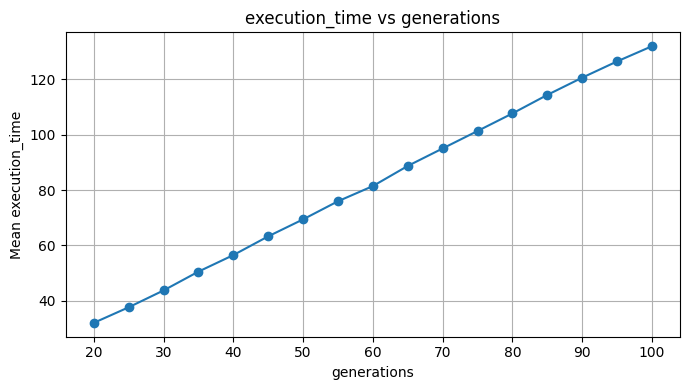

In [170]:
plot_mean_metric(df, tested, result)

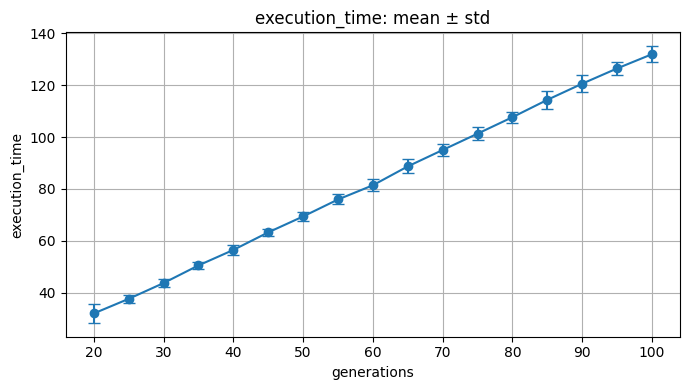

In [171]:
plot_mean_std(df, tested, result)

C:\Users\milaz\AppData\Local\Temp\ipykernel_15104\1210588720.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


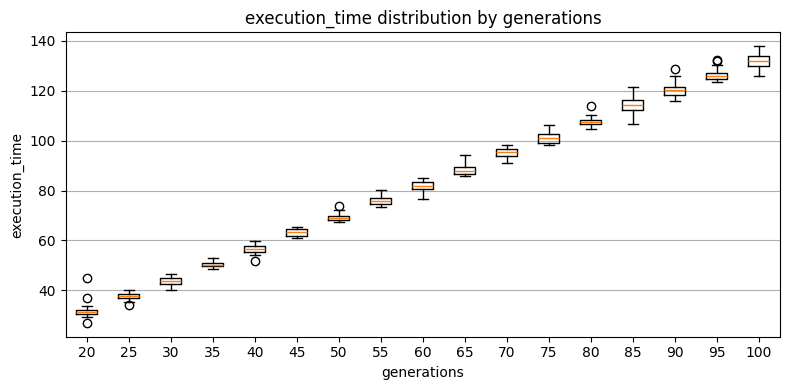

In [172]:
plot_boxplot(df, tested, result)